In [1]:
#External libraries
import numpy as np
from scipy.spatial import Delaunay #Just to get triangulation
import matplotlib.pyplot as plt
from itertools import combinations
import random

#My libraries
from pull_back import pull_back_forward
from DOF import get_all_DOF_reference, get_edges_DOF, get_inner_DOF
from MyTri import MyTri, affine_mapping

In [2]:
vertices =np.array([[1., 1.],
                    [0., 2.],
                    [2., 1.],
                    [2., 2.]])

In [12]:
polynomial_degree = 9

In [13]:
tri = Delaunay(vertices)

In [14]:
#Retrieving DOFs and available indexes
DOF_edges = get_edges_DOF(tri, vertices, polynomial_degree-1)
all_DOF_reference, DOF_ref_inner, DOF_ref_edges, DOF_ref_vertices = get_all_DOF_reference(polynomial_degree)
DOF_inner, interior_index = get_inner_DOF(tri,vertices,DOF_ref_inner)

#Defining object of class MyTri to store our data
mytri = MyTri(vertices_index=tri.simplices, vertices_points=vertices,
             interior_index=interior_index, interior_points=DOF_inner,
             edges_points=DOF_edges)
mytri.edges_points
mytri.fill_affine_list()
mytri.fill_edges_DOF(DOF_ref_edges)
mytri.fill_DOF_ref_triangle(all_DOF_reference)
mytri.DOF_ref_triangle
mytri.get_boundary_indexes(tri,polynomial_degree)
#mytri.boundary_indexes
#mytri.affine_list[0].A@np.array([0.,1.])+mytri.affine_list[0].b

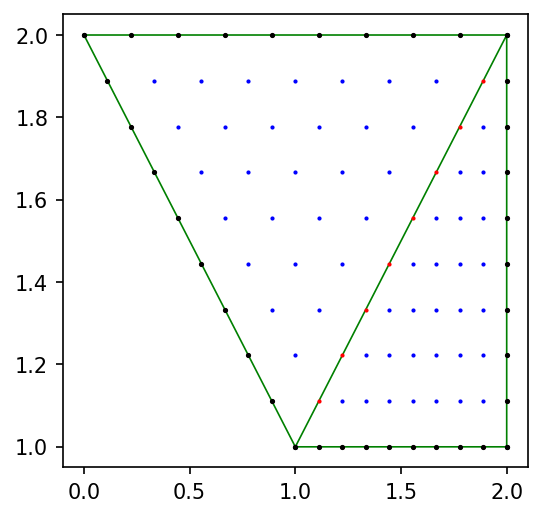

In [16]:
#### Plotting
fig, ax = plt.subplots(dpi=150,figsize=(4,4))
ax.triplot(vertices[:,0],vertices[:,1],tri.simplices, color='green', lw=0.8)
if polynomial_degree>2:
    ax.plot(DOF_inner[:,0],DOF_inner[:,1], 'b.', markersize=2)
if polynomial_degree>1:
    ax.plot(DOF_edges[:,0],DOF_edges[:,1], 'r.' , markersize = 2)
ax.plot(vertices[:,0],vertices[:,1], 'k.', markersize = 3)
#Plotting boundary points
ax.plot(mytri.global_DOF[mytri.boundary_indexes][:,0],mytri.global_DOF[mytri.boundary_indexes][:,1],'k.', markersize = 3)
plt.show()
plt.close()